<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [97]:
##### Your Code Here #####
import tensorflow as tf
from sklearn import datasets
boston = datasets.load_boston()
feature_names = boston['feature_names']

tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)



((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [98]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [99]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [100]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping




import time
start_time = time.time()

#load data and target vector from boston data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [101]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [102]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [103]:
X_test

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [104]:
X_test.shape, y_test.shape

((102, 13), (102,))

In [105]:
# X_train, X_val = train_test_split(X_train, train_size=0.8, test_size=0.2, random_state=42)
# X_train.shape, X_val.shape

In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
pred = model.predict(X_test)
mean_squared_error(pred, y_test)


23.195599256422906

### Normalizing the data

In [108]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import Normalizer

n = Normalizer()

#load data and target vector from boston data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()


In [109]:
X_train = n.fit_transform(X_train)
X_test = n.fit_transform(X_test)

In [110]:
X_train

array([[2.41189924e-03, 0.00000000e+00, 1.59296858e-02, ...,
        4.10962409e-02, 7.76718953e-01, 3.66343633e-02],
       [4.07923050e-05, 1.54587284e-01, 3.80378407e-03, ...,
        2.75446433e-02, 7.40857215e-01, 5.82747215e-03],
       [6.34505528e-03, 0.00000000e+00, 2.34463745e-02, ...,
        2.61666721e-02, 4.86441025e-01, 4.22293817e-03],
       ...,
       [7.29281484e-05, 7.36435428e-02, 1.27508534e-02, ...,
        3.55593107e-02, 7.62210668e-01, 1.64751126e-02],
       [4.37205159e-03, 0.00000000e+00, 3.98313637e-02, ...,
        2.99040371e-02, 5.32881804e-01, 3.21214113e-02],
       [3.09311543e-05, 1.28969372e-01, 6.29800433e-03, ...,
        3.35320367e-02, 8.09712706e-01, 9.41476414e-03]])

In [111]:
X_test

array([[2.67567471e-02, 0.00000000e+00, 2.67795319e-02, ...,
        2.98865495e-02, 4.03172511e-02, 4.29804090e-02],
       [2.07806276e-04, 0.00000000e+00, 1.68719346e-02, ...,
        3.00020416e-02, 6.65691367e-01, 2.73220840e-02],
       [1.19845746e-04, 0.00000000e+00, 1.13152524e-02, ...,
        4.40400960e-02, 8.65322480e-01, 2.12351750e-02],
       ...,
       [3.21889389e-03, 0.00000000e+00, 3.43696005e-02, ...,
        2.58035305e-02, 6.83898879e-01, 3.37025704e-03],
       [7.07644197e-04, 0.00000000e+00, 1.22522104e-02, ...,
        3.43852356e-02, 7.74063034e-01, 1.91885424e-02],
       [6.10350794e-03, 0.00000000e+00, 4.08709594e-02, ...,
        3.06845303e-02, 5.01305905e-01, 2.04772274e-02]])

In [112]:
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(pred, y_test)

18.16551049349646

### Neural Network Model

In [147]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

model = Sequential(name = "boston_model")
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(10, activation = "relu"))

model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])

In [114]:
model.summary()

Model: "boston_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [115]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 25ms/step - loss: 567.0136 - mean_squared_error: 567.0136
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 567.2629 - mean_squared_error: 567.2629
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 523.6423 - mean_squared_error: 523.6423
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 482.1244 - mean_squared_error: 482.1244
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 435.9824 - mean_squared_error: 435.9824
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 412.1182 - mean_squared_error: 412.1182
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 398.0923 - mean_squared_error: 398.0923
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 392.5605 - mean_squared_error: 392.5605
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 397.1087 - mean_square

In [116]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=hist.epoch, y=hist.history['mean_squared_error'], mode='markers'))
fig.update_layout(title="Mean Squared Error by Epoch")
fig.show()

In [117]:
scores = model.evaluate(X_test, y_test)
scores

4/4 [==============================] - 0s 34ms/step - loss: 340.2130 - mean_squared_error: 340.2130


[340.2129821777344, 340.2129821777344]

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [129]:
##### Your Code Here #####
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

from tensorflow.keras.datasets import fashion_mnist

2.4.0-dev20200727


In [119]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [120]:
X_train.shape

(60000, 28, 28)

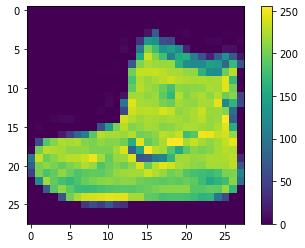

In [131]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [153]:
import numpy as np

X_train = X_train/255
X_test = X_test/255


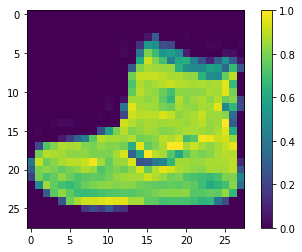

In [158]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [154]:
from tensorflow import keras


In [155]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [160]:
mnist_model = Sequential()
mnist_model.add(Flatten(input_shape=(28,28)))
mnist_model.add(Dense(128, activation="relu"))
mnist_model.add(Dense(10, activation="softmax"))

mnist_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mnist_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [165]:
from tensorflow.keras.callbacks import EarlyStopping

my_callbacks =[tf.keras.callbacks.EarlyStopping(patience=2)]

hist = mnist_model.fit(X_train, 
                       y_train, 
                       batch_size=32, 
                       epochs=100,
                       callbacks=my_callbacks
                       )

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 8.4791 - accuracy: 0.7397
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1582 - accuracy: 0.6963
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3808 - accuracy: 0.6671
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2249 - accuracy: 0.6852
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0694 - accuracy: 0.6815
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9309 - accuracy: 0.6874
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9281 - accuracy: 0.7062
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8253 - accuracy: 0.7137
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8094 - accuracy: 0.7349
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [162]:
scores=mnist_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.8844


In [163]:
scores

[0.3797932267189026, 0.8844000101089478]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



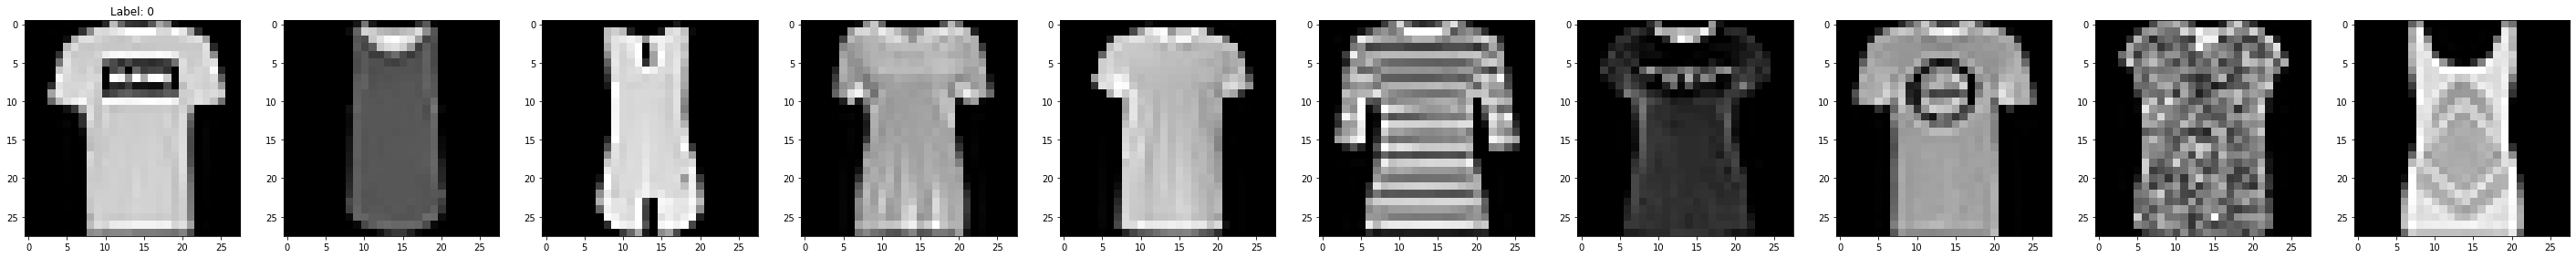

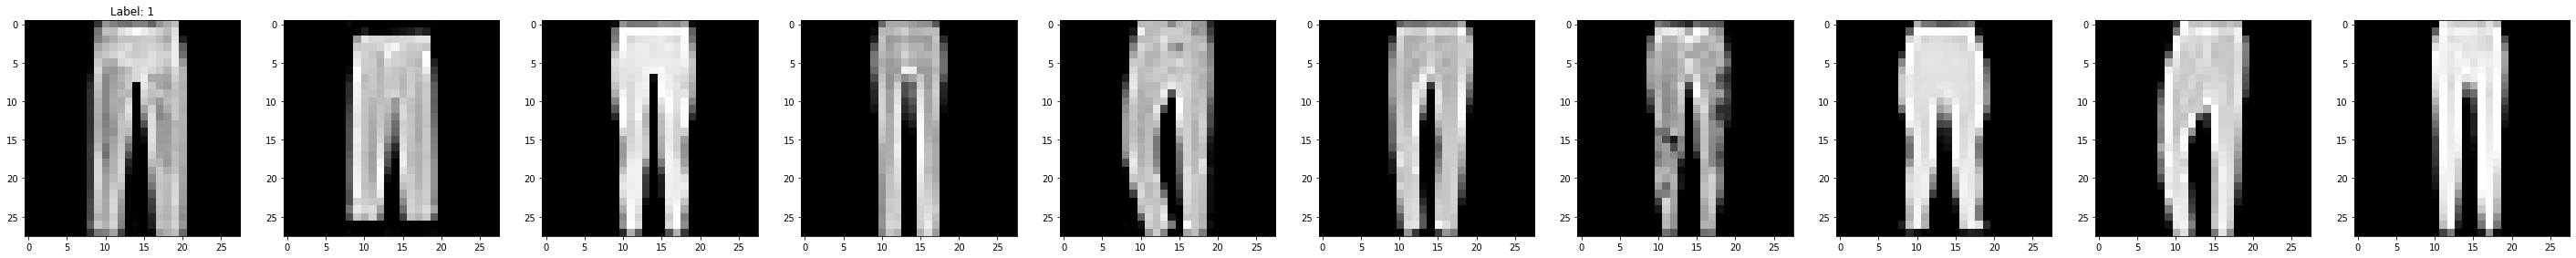

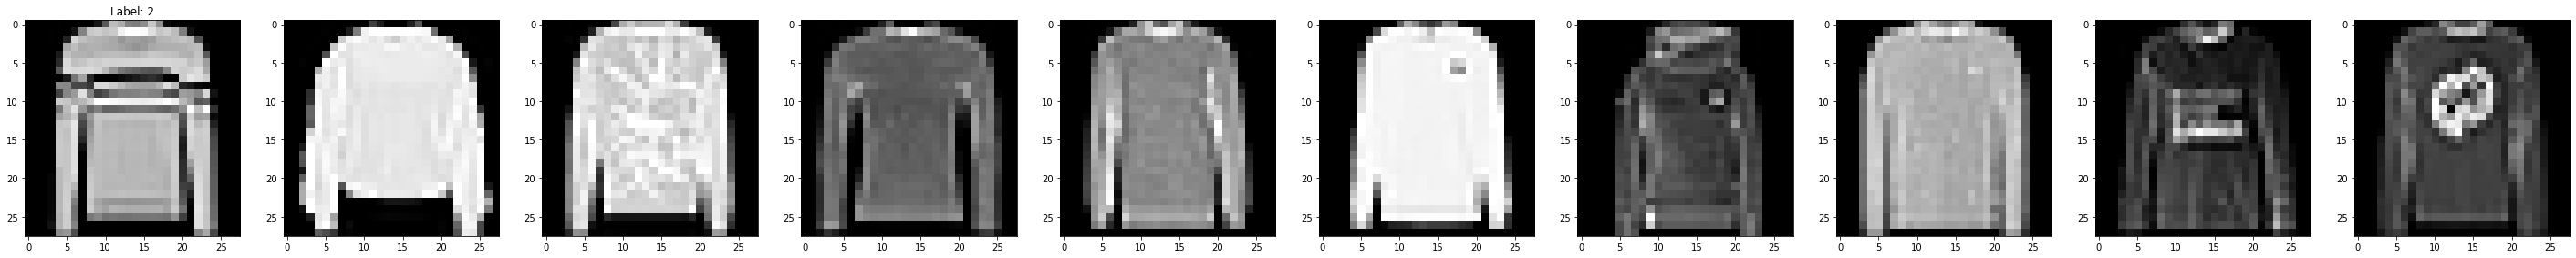

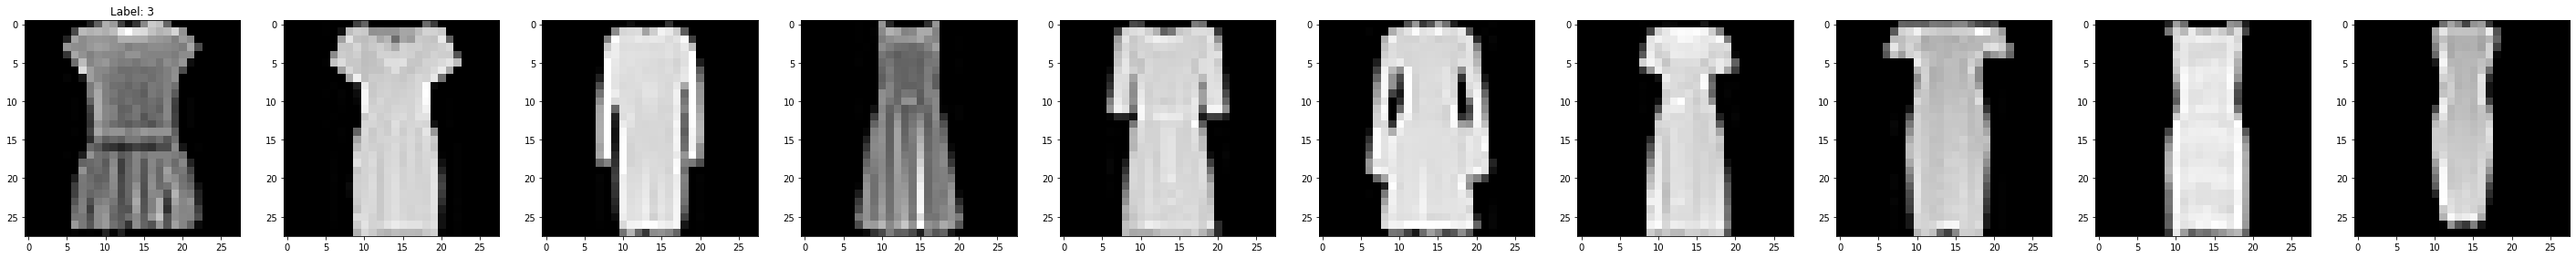

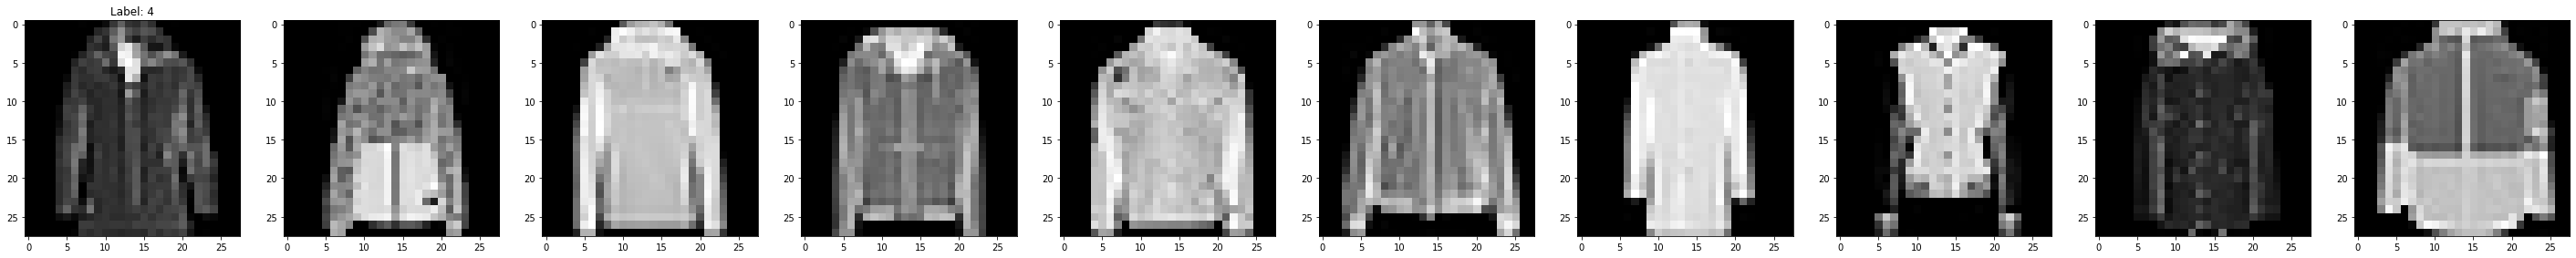

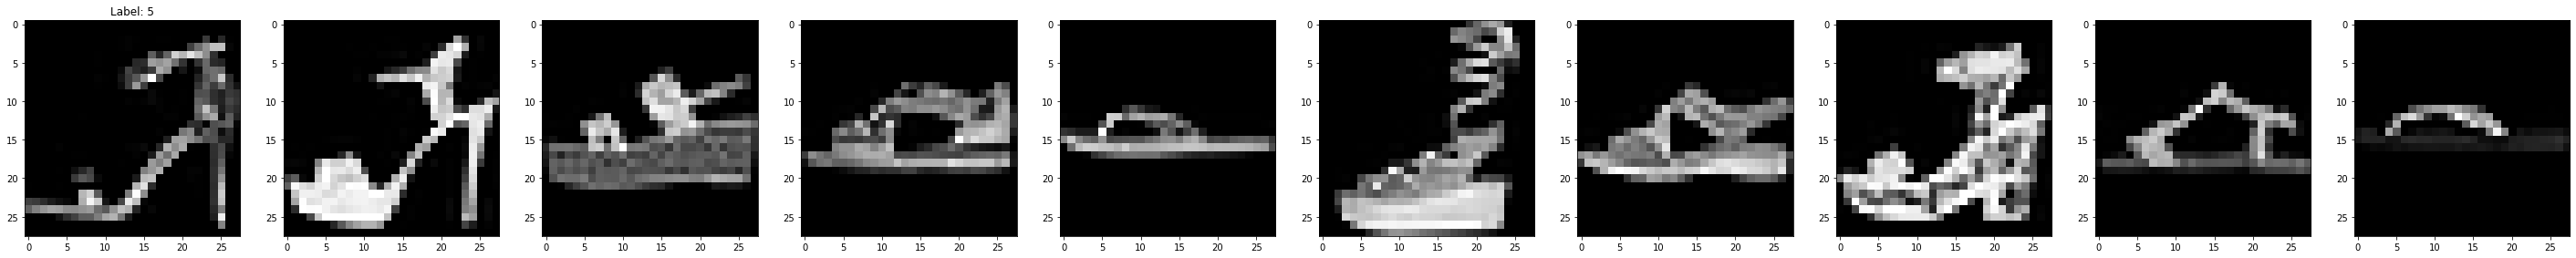

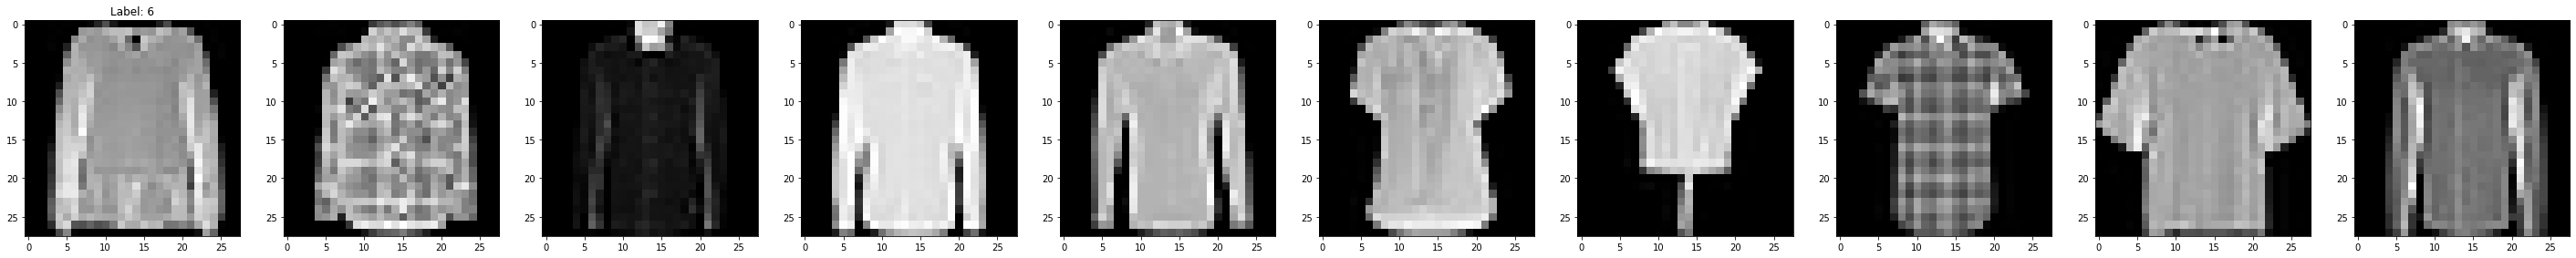

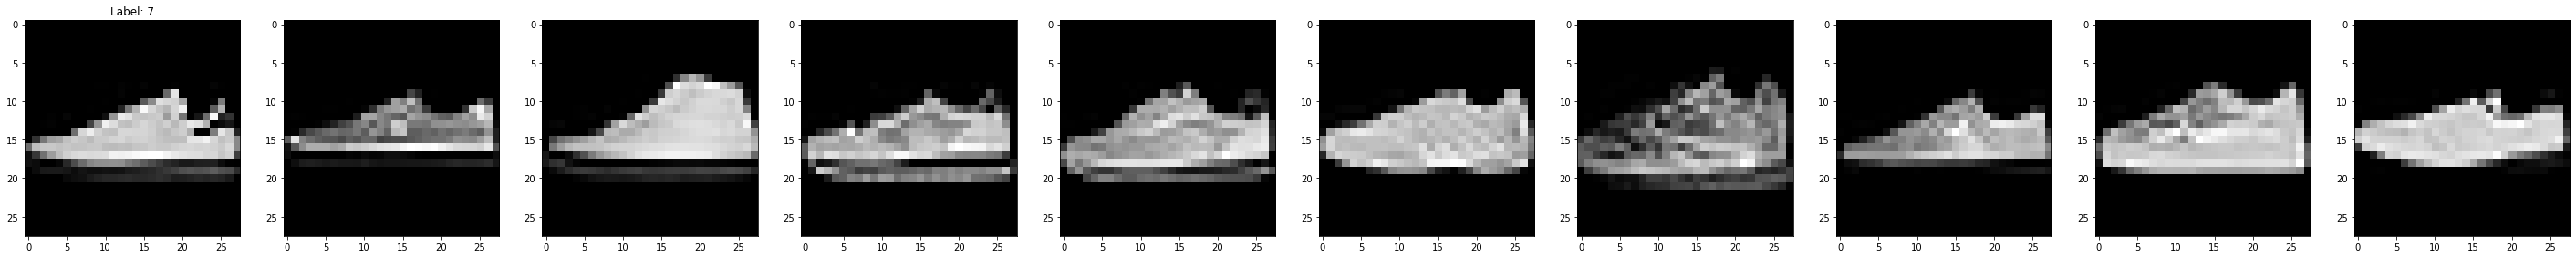

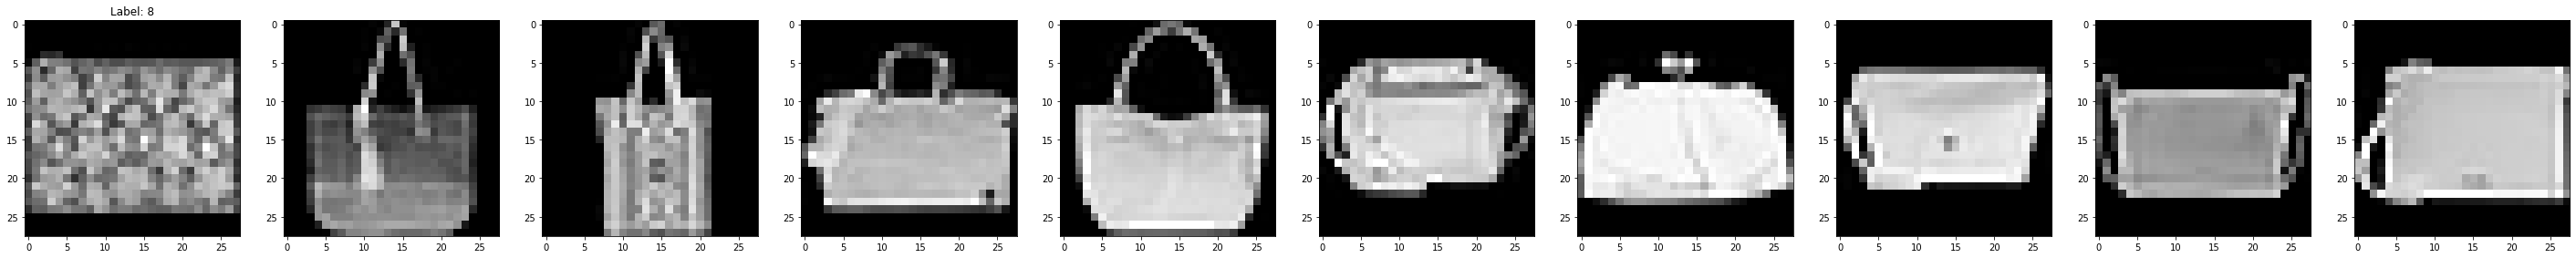

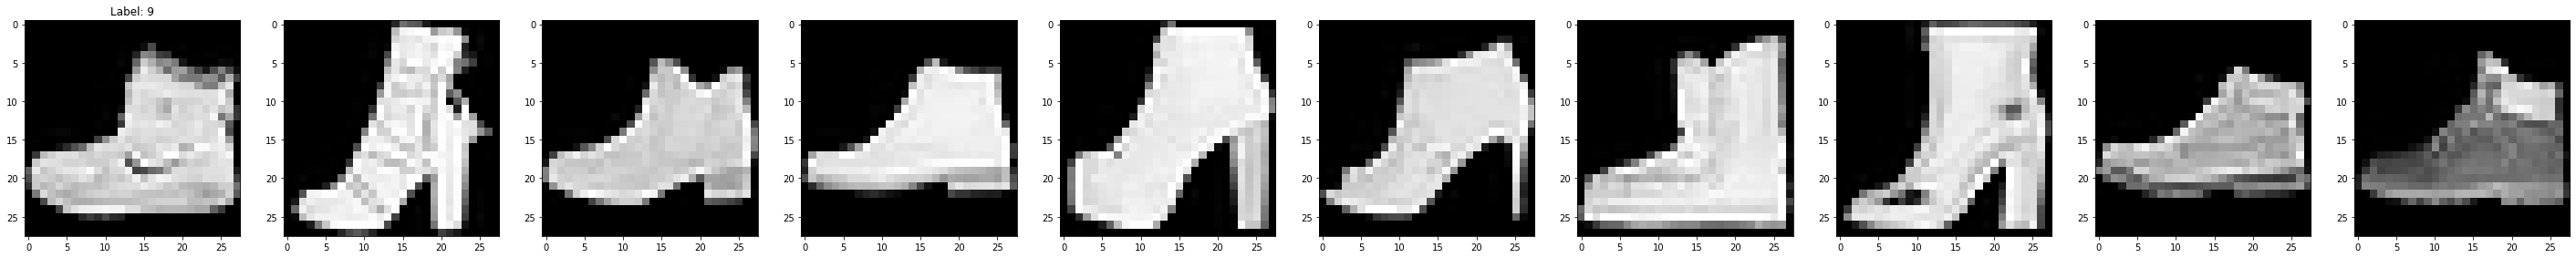

In [164]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train[0]

import matplotlib.pyplot as plt

for n in range(10):
    samples = [sample for sample, label in zip(X_train, y_train) if label == n][:10]
    
    fig, axes = plt.subplots(ncols=10, figsize=(50,5))
    for sample, ax in zip(samples, axes):
        ax.imshow(sample, "gray")
    axes[0].set_title(f"Label: {n}")
    fig.show()


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.